## Part 1

In [ ]:
newsapi_key = 'e609db865d2d45f0981b5f5fd984e4aa'

In [ ]:
import requests 
#Library in py 

In [ ]:
url = url = 'https://newsapi.org/v2/top-headlines?country=us&category=business&apiKey=e609db865d2d45f0981b5f5fd984e4aa'
resp = requests.get(url)
resp 

<Response [200]>

In [ ]:
if (resp.status_code == 200): 
  print("Everything as ok:", resp.status_code)
else:
  print("There was a problem:", resp.status_code)
  

Everything as ok: 200


In [ ]:
data = resp.text
data

'{"status":"ok","totalResults":70,"articles":[{"source":{"id":"ars-technica","name":"Ars Technica"},"author":"Jon Brodkin","title":"US hits anti-robocall milestone but annoying calls won’t stop any time soon - Ars Technica","description":"Large carriers deploy STIR/SHAKEN. Small carriers, old landlines are still problems.","url":"https://arstechnica.com/tech-policy/2021/07/us-hits-anti-robocall-milestone-but-annoying-calls-wont-stop-any-time-soon/","urlToImage":"https://cdn.arstechnica.net/wp-content/uploads/2021/04/robocalls-are-really-annoying-760x380.jpg","publishedAt":"2021-07-02T19:38:58Z","content":"32 with 26 posters participating\\r\\nThe nation\'s largest phone companies have met a federal deadline to deploy a new anti-robocall technology, but unwanted calls and scams will continue to be an annoyi… [+7916 chars]"},{"source":{"id":null,"name":"Yahoo Entertainment"},"author":"David Welch and Gabrielle Coppola","title":"Lordstown Motors Tumbles as Justice Department Begins Probe 

In [ ]:
#Open python dictionary with jason file 
data = resp.json()
data

{'articles': [{'author': 'Jon Brodkin',
   'content': "32 with 26 posters participating\r\nThe nation's largest phone companies have met a federal deadline to deploy a new anti-robocall technology, but unwanted calls and scams will continue to be an annoyi… [+7916 chars]",
   'description': 'Large carriers deploy STIR/SHAKEN. Small carriers, old landlines are still problems.',
   'publishedAt': '2021-07-02T19:38:58Z',
   'source': {'id': 'ars-technica', 'name': 'Ars Technica'},
   'title': 'US hits anti-robocall milestone but annoying calls won’t stop any time soon - Ars Technica',
   'url': 'https://arstechnica.com/tech-policy/2021/07/us-hits-anti-robocall-milestone-but-annoying-calls-wont-stop-any-time-soon/',
   'urlToImage': 'https://cdn.arstechnica.net/wp-content/uploads/2021/04/robocalls-are-really-annoying-760x380.jpg'},
  {'author': 'David Welch and Gabrielle Coppola',
   'content': '(Bloomberg) -- Lordstown Motors Corp. is being probed by the U.S. Justice Department in relatio

In [ ]:
data.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [ ]:
data['status']

'ok'

In [ ]:
data['totalResults']

70

In [ ]:
#List of returned article urls 
for article in data['articles']:
  print(article['url'])

https://arstechnica.com/tech-policy/2021/07/us-hits-anti-robocall-milestone-but-annoying-calls-wont-stop-any-time-soon/
https://finance.yahoo.com/news/lordstown-motors-tumbles-report-justice-162236981.html
https://www.cnbc.com/2021/07/02/fed-chair-powell-met-with-coinbase-ceo-brian-armstrong-in-may.html
https://www.cnbc.com/2021/07/02/bitcoin-etf-should-be-approved-already-sec-regulator-says.html
https://www.nytimes.com/2021/07/02/technology/restaurant-delivery-takeout-orders-covid-coronavirus.html
https://www.nytimes.com/2021/07/02/business/sweetgreen-return-to-office.html
https://www.cnn.com/2021/07/02/tech/ftc-broadcom/index.html
https://6abc.com/winning-mega-millions-tickets-7-eleven-levittown-pennsylvania-lottery-number/10853845/
https://www.cnbc.com/2021/07/02/irs-data-shows-some-high-income-people-received-1400-checks.html
https://www.businessinsider.com/walk-outs-mcdonalds-jack-in-the-box-over-heat-wave-2021-7
https://www.foxbusiness.com/lifestyle/passenger-plane-exit-window-ta

In [ ]:
def getNews(source):

  url_list = []

  for article in data['articles']:
    if source == article['source'] ['id']:
      url_list.append(article['url'])
  return url_list

getNews('google-news')

[]

In [ ]:
#getNews function to accept name of source, get queries of NewsAPI and a list of URLs for news stories 
def getNews(source):

  url_list = []

  for article in data['articles']:
    if source == article['source'] ['id']:
      url_list.append(article['url'])
  return url_list

getNews('google-news')

[]

## Part 2

In [ ]:
import requests
import json

In [ ]:
api_key_watson = 'RS-8eevEfLig_LWpw8JEeZpTE6drExYOE-12-I_WfjNi'
URL = 'https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/03696d8e-e342-43ef-8edb-a8b8981cdb94'

In [ ]:
def processURL(analyze_url):
  endpoint_ibm_watson = f"{URL}/v1/analyze"
  params = {
      'version': '2020-08-01',
  }
  headers = {
      'Content-Type': 'application/json',
  }
  watson_options = {
      'url': analyze_url,
      'features': {
          'entities': {
              'sentiment': True,
              'emotion': True,
              'limit': 10
          }
      }
  }
  username = 'apikey'
  password = api_key_watson

  resp = requests.post(endpoint_ibm_watson,
                       data = json.dumps(watson_options),
                       headers = headers,
                       params = params,
                       auth = (username, password)
                       )
  return resp.json()

In [ ]:
def extractEntities(url, source):
  data = processURL(url)

  entity_list = []
  for entity in data['entities']:
    entity_list.append({
        'name': entity['text'],
        'relevance': entity['relevance'],
        'sentiment': entity['sentiment']['score'],
        'url': url,
        'source': source
    })
  return entity_list

In [ ]:
url = 'https://www.wsj.com/articles/biden-to-sign-bill-making-juneteenth-a-federal-holiday-11623944038?mod=politics_lead_pos2'
source = 'The Wall Street Journal;'
extractEntities(url, source)

[{'name': 'President Biden',
  'relevance': 0.950251,
  'sentiment': -0.776928,
  'source': 'The Wall Street Journal;',
  'url': 'https://www.wsj.com/articles/biden-to-sign-bill-making-juneteenth-a-federal-holiday-11623944038?mod=politics_lead_pos2'},
 {'name': 'U.S. Office of Personnel Management',
  'relevance': 0.822278,
  'sentiment': -0.261008,
  'source': 'The Wall Street Journal;',
  'url': 'https://www.wsj.com/articles/biden-to-sign-bill-making-juneteenth-a-federal-holiday-11623944038?mod=politics_lead_pos2'},
 {'name': 'Mr. Biden',
  'relevance': 0.615633,
  'sentiment': 0.752289,
  'source': 'The Wall Street Journal;',
  'url': 'https://www.wsj.com/articles/biden-to-sign-bill-making-juneteenth-a-federal-holiday-11623944038?mod=politics_lead_pos2'},
 {'name': 'Opal Lee',
  'relevance': 0.546577,
  'sentiment': 0.752289,
  'source': 'The Wall Street Journal;',
  'url': 'https://www.wsj.com/articles/biden-to-sign-bill-making-juneteenth-a-federal-holiday-11623944038?mod=politics_

## Part 3

In [ ]:
import requests 

In [ ]:
newsapi_key = 'e609db865d2d45f0981b5f5fd984e4aa'
endpoint = 'https://newsapi.org/v2/top-headlines'
parameters = {
    'country': 'us',
    'category': 'business',
    'apiKey': newsapi_key,
    'pagesize': 100
}
resp = requests.get(endpoint, params = parameters)
data = resp.json()

In [ ]:
if (resp.status_code ==200):
  print("Everything as ok", resp.status_code)
else:
  print("There was a problem:", resp.status_code)

Everything as ok 200


In [ ]:
data = resp.json()
data

{'articles': [{'author': 'Jon Brodkin',
   'content': "32 with 26 posters participating\r\nThe nation's largest phone companies have met a federal deadline to deploy a new anti-robocall technology, but unwanted calls and scams will continue to be an annoyi… [+7916 chars]",
   'description': 'Large carriers deploy STIR/SHAKEN. Small carriers, old landlines are still problems.',
   'publishedAt': '2021-07-02T19:38:58Z',
   'source': {'id': 'ars-technica', 'name': 'Ars Technica'},
   'title': 'US hits anti-robocall milestone but annoying calls won’t stop any time soon - Ars Technica',
   'url': 'https://arstechnica.com/tech-policy/2021/07/us-hits-anti-robocall-milestone-but-annoying-calls-wont-stop-any-time-soon/',
   'urlToImage': 'https://cdn.arstechnica.net/wp-content/uploads/2021/04/robocalls-are-really-annoying-760x380.jpg'},
  {'author': 'David Welch and Gabrielle Coppola',
   'content': '(Bloomberg) -- Lordstown Motors Corp. is being probed by the U.S. Justice Department in relatio

In [ ]:
data.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [ ]:
for article in data['articles']:
  print(article['source'])

{'id': 'ars-technica', 'name': 'Ars Technica'}
{'id': None, 'name': 'Yahoo Entertainment'}
{'id': None, 'name': 'CNBC'}
{'id': None, 'name': 'CNBC'}
{'id': None, 'name': 'New York Times'}
{'id': None, 'name': 'New York Times'}
{'id': 'cnn', 'name': 'CNN'}
{'id': None, 'name': 'WPVI-TV'}
{'id': None, 'name': 'CNBC'}
{'id': 'business-insider', 'name': 'Business Insider'}
{'id': None, 'name': 'Fox Business'}
{'id': None, 'name': 'New York Post'}
{'id': 'fox-news', 'name': 'Fox News'}
{'id': None, 'name': 'CNBC'}
{'id': None, 'name': 'CNBC'}
{'id': None, 'name': 'WGAL Susquehanna Valley Pa.'}
{'id': None, 'name': 'Detroit Free Press'}
{'id': 'the-verge', 'name': 'The Verge'}
{'id': 'the-verge', 'name': 'The Verge'}
{'id': 'fox-news', 'name': 'Fox News'}
{'id': 'techcrunch', 'name': 'TechCrunch'}
{'id': None, 'name': 'Yahoo Entertainment'}
{'id': None, 'name': 'Yahoo Entertainment'}
{'id': None, 'name': 'The-sun.com'}
{'id': 'cnn', 'name': 'CNN'}
{'id': None, 'name': 'MarketWatch'}
{'id': '

In [ ]:
def getNews(source):
  url_list = []
  for article in data['articles']:
    if source == article['source']['name']:
      url_list.append(article['url'])
  return url_list
getNews('CNBC')

['https://www.cnbc.com/2021/07/02/fed-chair-powell-met-with-coinbase-ceo-brian-armstrong-in-may.html',
 'https://www.cnbc.com/2021/07/02/bitcoin-etf-should-be-approved-already-sec-regulator-says.html',
 'https://www.cnbc.com/2021/07/02/irs-data-shows-some-high-income-people-received-1400-checks.html',
 'https://www.cnbc.com/2021/07/02/stocks-making-the-biggest-moves-midday-krispy-kreme-virgin-galactic-ibm-didi-and-more.html',
 'https://www.cnbc.com/2021/07/02/jeff-bezos-says-this-is-how-you-earn-trust-and-build-reputation-it-really-is-that-simple.html',
 'https://www.cnbc.com/2021/07/02/crispr-gene-editing-could-reach-patients-very-soon-intellia-ceo.html',
 'https://www.cnbc.com/2021/07/02/manhattan-real-estate-prices-reach-new-record-with-buying-frenzy-.html',
 'https://www.cnbc.com/2021/07/01/curevac-to-plow-forward-with-covid-vaccine-despite-trial-results-.html']

In [ ]:
def getNews(source):
  url_list = []
  for article in data['articles']:
    if source == article['source']['name']:
      url_list.append(article['url'])
  return url_list
getNews('The Wall Street Journal')

[]

In [ ]:
source = 'The Wall Street Journal'
url = getNews(source)

url_wsj = []

for all_url in url: 
  url_wsj += extractEntities(all_url, source)
print(url_wsj)

[]


In [ ]:
source = "CNBC"
url = getNews(source)

url_cnbc = []

for all_url in url:
  url_cnbc +=extractEntities(all_url, source) 
print(url_cnbc)

[{'name': 'Fed', 'relevance': 0.954789, 'sentiment': -0.323186, 'url': 'https://www.cnbc.com/2021/07/02/fed-chair-powell-met-with-coinbase-ceo-brian-armstrong-in-may.html', 'source': 'CNBC'}, {'name': 'Powell', 'relevance': 0.858353, 'sentiment': 0.792678, 'url': 'https://www.cnbc.com/2021/07/02/fed-chair-powell-met-with-coinbase-ceo-brian-armstrong-in-may.html', 'source': 'CNBC'}, {'name': 'Armstrong', 'relevance': 0.811567, 'sentiment': 0.792678, 'url': 'https://www.cnbc.com/2021/07/02/fed-chair-powell-met-with-coinbase-ceo-brian-armstrong-in-may.html', 'source': 'CNBC'}, {'name': 'Jerome Powell', 'relevance': 0.74425, 'sentiment': 0, 'url': 'https://www.cnbc.com/2021/07/02/fed-chair-powell-met-with-coinbase-ceo-brian-armstrong-in-may.html', 'source': 'CNBC'}, {'name': 'cryptocurrency exchange Coinbase', 'relevance': 0.726825, 'sentiment': 0, 'url': 'https://www.cnbc.com/2021/07/02/fed-chair-powell-met-with-coinbase-ceo-brian-armstrong-in-may.html', 'source': 'CNBC'}, {'name': 'JPMor

## Part 4 

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(url_wsj+url_cnbc)
df

,name,relevance,sentiment,url,source
0,Fed,0.954789,-0.323186,https://www.cnbc.com/2021/07/02/fed-chair-powe...,CNBC
1,Powell,0.858353,0.792678,https://www.cnbc.com/2021/07/02/fed-chair-powe...,CNBC
2,Armstrong,0.811567,0.792678,https://www.cnbc.com/2021/07/02/fed-chair-powe...,CNBC
3,Jerome Powell,0.744250,0.000000,https://www.cnbc.com/2021/07/02/fed-chair-powe...,CNBC
4,cryptocurrency exchange Coinbase,0.726825,0.000000,https://www.cnbc.com/2021/07/02/fed-chair-powe...,CNBC
...,...,...,...,...,...
72,Europe,0.284694,0.659356,https://www.cnbc.com/2021/07/01/curevac-to-plo...,CNBC
73,53%,0.219263,0.000000,https://www.cnbc.com/2021/07/01/curevac-to-plo...,CNBC
74,77%,0.212388,0.000000,https://www.cnbc.com/2021/07/01/curevac-to-plo...,CNBC
75,CNBC,0.210450,0.000000,https://www.cnbc.com/2021/07/01/curevac-to-plo...,CNBC


In [ ]:
import numpy as np

relevance_df = pd.pivot_table(df, values = 'relevance', index = ['name'], columns=['source'], aggfunc= np.sum)

In [ ]:
relevance_df

source,CNBC
name,
"$1,400",0.952349
$1.9 million,0.396186
"$112,500",0.332960
"$120,000",0.302144
"$150,000",0.328324
...,...
Winklevoss Bitcoin Trust,0.305851
autoimmune diseases,0.185336
cryptocurrency exchange Coinbase,0.726825


In [ ]:
sentiment_df = pd.pivot_table(df, values = 'sentiment', index = ['name'], columns=['source'], aggfunc= np.mean)
sentiment_df

source,CNBC
name,
"$1,400",0.541864
$1.9 million,0.578500
"$112,500",0.000000
"$120,000",-0.816164
"$150,000",0.000000
...,...
Winklevoss Bitcoin Trust,0.626151
autoimmune diseases,-0.862116
cryptocurrency exchange Coinbase,0.000000


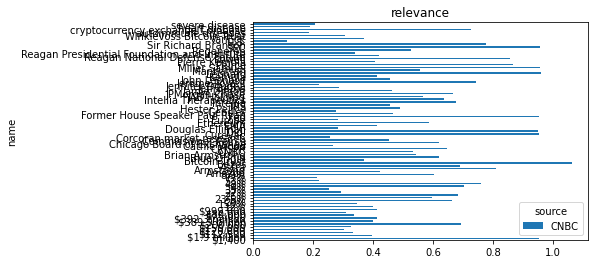

In [ ]:
relevance_df.plot(kind ='barh', title = 'relevance')

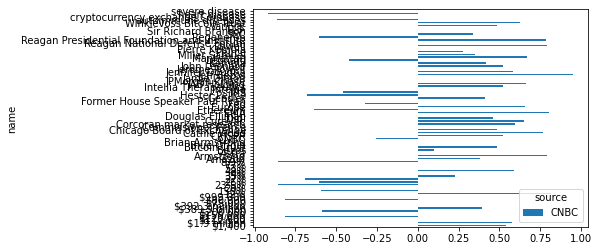

In [ ]:
sentiment_df.plot(kind = 'barh')

In [ ]:
relevance_df.dropna()

source,CNBC
name,
"$1,400",0.952349
$1.9 million,0.396186
"$112,500",0.332960
"$120,000",0.302144
"$150,000",0.328324
...,...
Winklevoss Bitcoin Trust,0.305851
autoimmune diseases,0.185336
cryptocurrency exchange Coinbase,0.726825


In [ ]:
sentiment_df.dropna()

source,CNBC
name,
"$1,400",0.541864
$1.9 million,0.578500
"$112,500",0.000000
"$120,000",-0.816164
"$150,000",0.000000
...,...
Winklevoss Bitcoin Trust,0.626151
autoimmune diseases,-0.862116
cryptocurrency exchange Coinbase,0.000000
